In [2]:
import statsmodels.api as sm
import seaborn as sns
from statsmodels.api import OLS
import matplotlib.pyplot as plt

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [6]:
tips[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

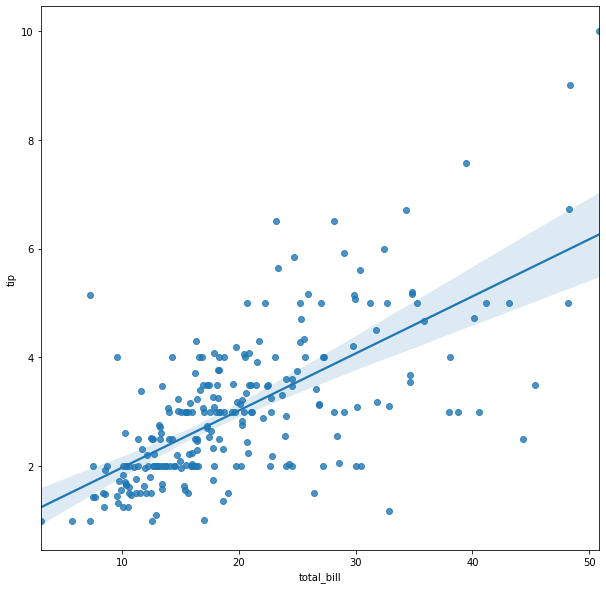

In [7]:
plt.figure(figsize=(10,10))
sns.regplot(x = 'total_bill',y = 'tip',data = tips)

In [8]:
sm_lm = OLS(tips['tip'], sm.add_constant(tips[['total_bill']]))
result = sm_lm.fit()

In [9]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 04 May 2021   Prob (F-statistic):           6.69e-34
Time:                        20:02:09   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [10]:
import statsmodels.api as sm
import seaborn as sns
from statsmodels.api import OLS
import matplotlib.pyplot as plt

In [11]:
tips[['size','total_bill','tip']]

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [12]:
tips[['tip','total_bill','size']].describe()

,tip,total_bill,size
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,2.569672
std,1.383638,8.902412,0.951100
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.900000,17.795000,2.000000
75%,3.562500,24.127500,3.000000
max,10.000000,50.810000,6.000000


In [13]:
tips[['tip','total_bill','size']].corr()

,tip,total_bill,size
tip,1.000000,0.675734,0.489299
total_bill,0.675734,1.000000,0.598315
size,0.489299,0.598315,1.000000


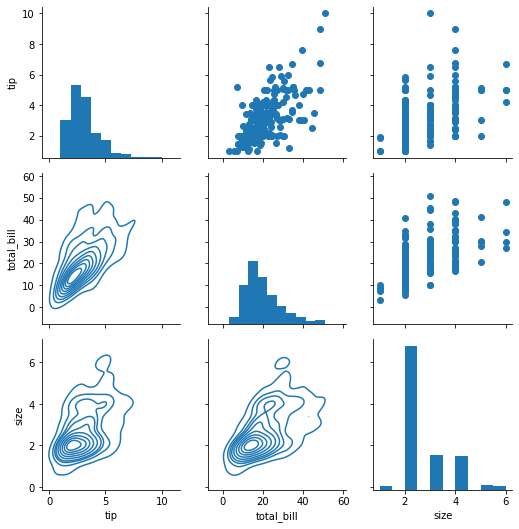

In [14]:
g = sns.PairGrid(tips[['tip','total_bill','size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [15]:
sm_lm = OLS(tips['tip'], sm.add_constant(tips[['total_bill','size']]))
result = sm_lm.fit()

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 04 May 2021   Prob (F-statistic):           9.67e-34
Time:                        20:09:48   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

In [17]:
#Based on the model result, all of the variables (total_bill and size) are significant to the tip since the probability is below 0.05. 

#The total_bill positively influences the dependent variable. It means that if the total_bill increases by one percent (dollar), the tip will increase by 0.0927 percent (dollar) provided that the other independent variables are constant or equal to zero. Moreover, the size positively influences the dependent variable and if the size is increased by one percent then the tip will increase by 0.1926.

#R-Square = 46.8% : This model can explain 46.8% variation of tips and the rest is explained by another factor.

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

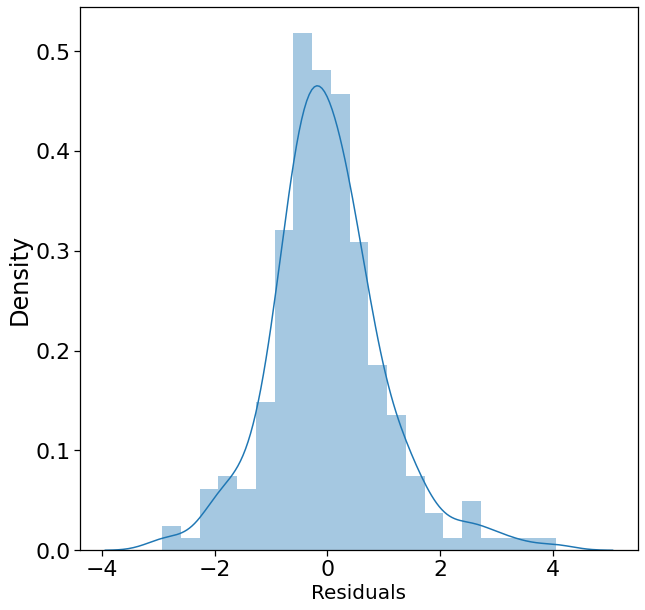

In [18]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


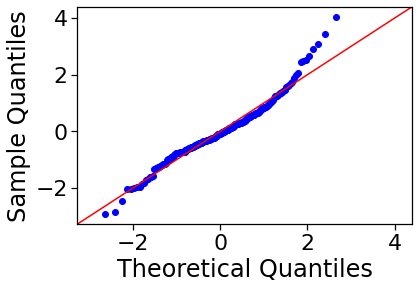

In [19]:
sm.qqplot(result.resid, line = '45')
plt.show()

C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fadhil_F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

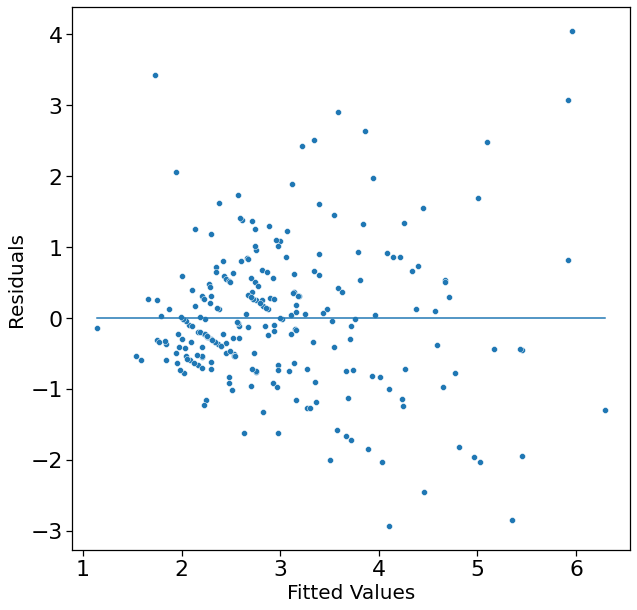

In [20]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
tips_dummy = pd.get_dummies(tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])

NameError: name 'pd' is not defined

In [46]:
fitur = ['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun']
target = 'tip' 
sm_lm = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()

NameError: name 'tips_dummy' is not defined